In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import process_data.directions_coordinates as dc
import process_data.sincos as sincos
import functions as func
import process_data.n_n_distance as nn
import json
from tqdm.auto import tqdm

## Nov 5
### random polymer for 4 layers

## For on-lattices
### self-avoid

In [ ]:
import fnn.four_layers as model
polymer_len = 16
z_dim = 8
num_polymer = 10000
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
nn_distance = []
self_avoid_count = []
total_epochs = 4100
saving_step = 100
for i in tqdm(range(saving_step, total_epochs, saving_step)):
    noise = func.get_noise(num_polymer, z_dim)
    check_point = torch.load(f'../experiments/11_10/four_layers_sin_cos_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    # check_output_hist(output, i)
    fake_directions = convert_sin_cos_to_directions(output)
    a = np.zeros((10000, 15, 1))
    # make the first one is forward
    for i in range(len(a)):
        a[i] = np.vstack(([0], fake_directions[i]))
    coordinates = dc.direction_coordinate_three(a, 16)
    nn_distance.append(nn.n_n_distance(coordinates))

    # check the number of self avoid polymers
    # check_list = []
    # for coordinate in coordinates:
    #     check_list.append(check_fold_cross(coordinate))
    # count = 1
    # for i in check_list:
    #     if i == [0,0]:
    #         count += 1
    # self_avoid_count.append(count)

epoch = [i for i in range(saving_step, total_epochs, saving_step)]
# print(self_avoid_count)
print(nn_distance)
# plt.plot(epoch, self_avoid_count)
plt.show()
plt.plot(epoch, nn_distance)

In [2]:
input_directions = np.load('../data/self_avoid/16/directions.npy')
input_sin_cos = np.load('../data/self_avoid/16/sin_cos.npy')
input_coordinates = np.load('../data/self_avoid/16/coorinates.npy')
input_hist = input_sin_cos.reshape(-1, 1)
sns.histplot(input_hist)

FileNotFoundError: [Errno 2] No such file or directory: '../data/self_avoid/16/directions.npy'

### random

In [11]:
real_directions = np.load('../data/random/off_lattices/32/directions.npy')
real_sin_cos = np.load('../data/random/off_lattices/32/sin_cos.npy')
real_coordinates = np.load('../data/random/off_lattices/32/coordinates.npy')

In [18]:
import fnn.four_layers as model
polymer_len = 32
z_dim = 8
num_polymer = 10000
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
nn_distance = []
self_avoid_count = []
total_epochs = 4100
saving_step = 100
for i in tqdm(range(saving_step, total_epochs, saving_step)):
    noise = func.get_noise(num_polymer, z_dim)
    check_point = torch.load(f'../experiments/11_11/on_lattices_32/four_layers_sin_cos_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    fake_directions = sincos.sin_cos_to_directions_on_lattices(output)
    coordinates = dc.direction_coordinate_on_lattices(fake_directions)
    nn_distance.append(nn.n_n_distance(coordinates))

  0%|          | 0/40 [00:00<?, ?it/s]

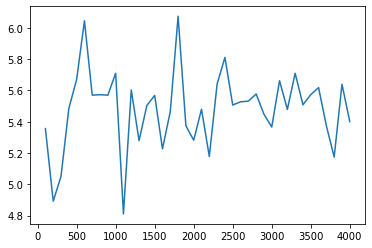

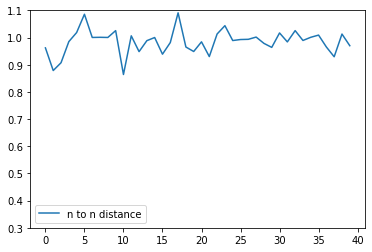

In [20]:
epoch = [i for i in range(saving_step, total_epochs, saving_step)]
plt.plot(epoch, nn_distance)
plt.show()
a = np.array(nn_distance)
a = a / np.sqrt(polymer_len - 1)
plt.plot(a, label='n to n distance')
plt.ylim(0.3,1.1)
plt.legend()
plt.show()

<AxesSubplot:ylabel='Count'>

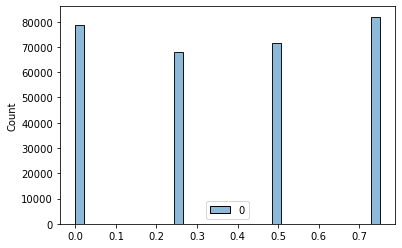

In [24]:
sns.histplot(fake_directions.reshape(-1,1))

In [26]:
fake_directions = sincos.sin_cos_directions_off_lattices(output)

<AxesSubplot:ylabel='Count'>

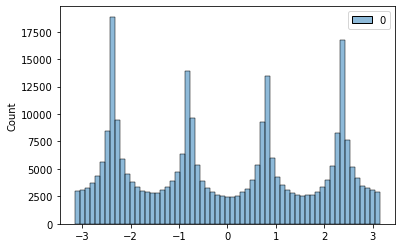

In [27]:
sns.histplot(fake_directions.reshape(-1,1))

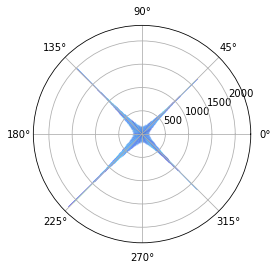

In [28]:
check_circular_hist(fake_directions)

In [ ]:
def read_json(file_path):
    """
    :param file_path: the path of json file
    :return: a python dict
    """
    with open(file_path, 'r') as fp:
        data = json.load(fp)
    return data

In [53]:
gen_data = read_json('../experiments/11_10/four_layers_sin_cos_gen.json')
disc_data = read_json('../experiments/11_10/four_layers_sin_cos_disc.json')

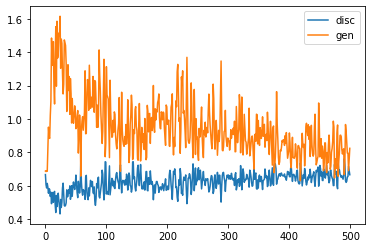

In [54]:
gen_loss = []
disc_loss = []
for i in gen_data:
    gen_loss += gen_data[i]
    disc_loss += disc_data[i]

plt.plot(disc_loss, label='disc')
plt.plot(gen_loss, label='gen')
plt.legend()
plt.show()

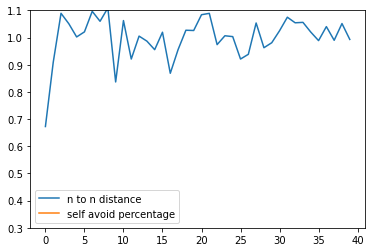

In [56]:
a = np.array(nn_distance)
# a = a / 6.99
a = a / np.sqrt(15)
b = np.array(self_avoid_count)
b = b / 10000
plt.plot(a, label='n to n distance')
plt.ylim(0.3,1.1)
plt.plot(b, label = 'self avoid percentage')
plt.legend()

In [57]:
ls = list(set(fake_st))
print(f'the percentage of unique is {len(ls) / 10000 }')

the percentage of unique is 0.9848


In [58]:
check_point = torch.load(f'../experiments/11_10/four_layers_sin_cos_gen_{i}.pth.tar')
generator.load_state_dict(check_point['gen_state_dict'])
output = generator(noise).data.numpy()
print(np.shape(output))

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/11_10/four_layers_sin_cos_gen_epoch500.pth.tar'

In [10]:
import fnn.four_layers as model
z_dim = 8
generator = model.GeneratorNet(z_dim, 62)
print(generator)
num_polymer = 10000
noise = func.get_noise(num_polymer, z_dim)
nn_distance = []
self_avoid_count = []
total_epochs = 4100
saving_step = 400
for i in tqdm(range(saving_step, total_epochs, saving_step)):
    check_point = torch.load(f'../experiments/11_11/off_lattices_32/four_layers_sin_cos_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    # check_output_hist(output, i)
    fake_directions = sincos.sin_cos_directions_off_lattices(output)
    coordinates = dc.direction_coordinate_off_lattices(fake_directions)
    nn_distance.append(nn.n_n_distance(coordinates))

GeneratorNet(
  (hidden0): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU(inplace=True)
  )
  (hidden1): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.3, inplace=False)
  )
  (out): Sequential(
    (0): Linear(in_features=64, out_features=62, bias=True)
    (1): Tanh()
  )
)


  0%|          | 0/10 [00:00<?, ?it/s]

(0.5, 1.1)

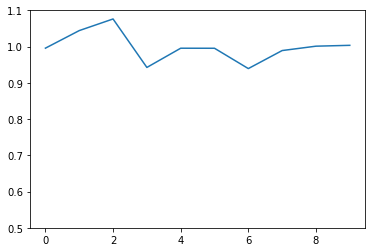

In [11]:
a = np.array(nn_distance) / 5.5677643628300215
plt.plot(a)
plt.ylim(0.5, 1.1)

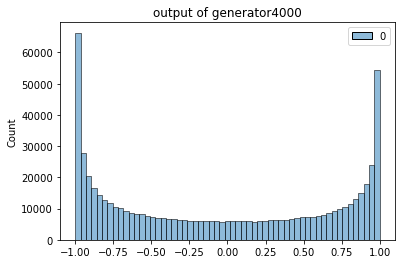

In [12]:
check_output_hist(output, 4000)

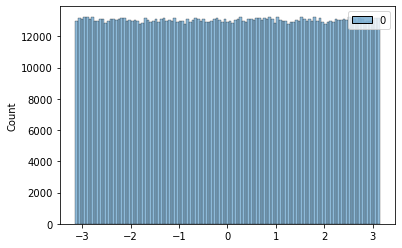

<AxesSubplot:ylabel='Count'>

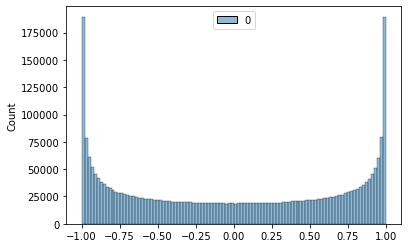

In [25]:
input_directions = np.load('../data/random/off_lattices/directions.npy')
input_coordinates = np.load('../data/random/off_lattices/coordinates.npy')
nn.n_n_distance(input_coordinates)
sns.histplot(input_directions.reshape(-1,1))
plt.show()
sns.histplot(input_sin_cos.reshape(-1,1))

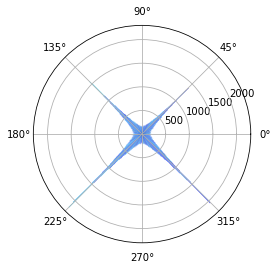

In [14]:
fake_directions = fake_directions.reshape(-1,1)
N = 1000
a = np.zeros([1000,])
interval = 2 * np.pi / N
for i in fake_directions:
    a[int(i // interval)] += 1

bottom = 2
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, a, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)
plt.show()


plt.savefig('circle histgram 32', dpi=500)

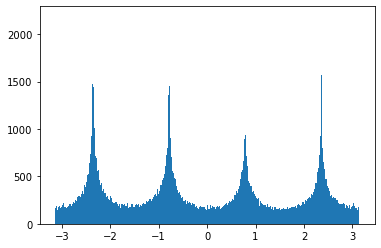

In [15]:
plt.hist(fake_directions, N)
plt.savefig('histgram 32', dpi=500)
plt.show()